#### Install and/or load necessary packages

In [ ]:
library(tidyverse) # Core package for data manipulation and visualization
library(ggplot2)    # The main package for creating visualizations

#### Importing the Dataset

In [ ]:
forestfires <- read_csv("C:\\Users\\hunte\\OneDrive\\MBA\\Spring Term 1\\Data Visualization & Inferential Statistics\\R Code Workshop\\R Project\\forestfires.csv")

#### Checking the Dataset

###### Structure of Dataset

In [3]:
str(forestfires)

spc_tbl_ [517 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X    : num [1:517] 7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : num [1:517] 5 4 4 6 6 6 6 6 6 5 ...
 $ month: chr [1:517] "mar" "oct" "oct" "mar" ...
 $ day  : chr [1:517] "fri" "tue" "sat" "fri" ...
 $ FFMC : num [1:517] 86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num [1:517] 26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num [1:517] 94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num [1:517] 5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num [1:517] 8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : num [1:517] 51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num [1:517] 6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num [1:517] 0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num [1:517] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   X = col_double(),
  ..   Y = col_double(),
  ..   month = col_character(),
  ..   day = col_character(),
  ..   FFMC = col_double(),
  ..   DMC = col_double(),
  ..   DC = col_double(),


###### First few rows of Dataset

In [4]:
head(forestfires)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


###### Check for Missing Values

In [5]:
sum(is.na(forestfires))

[1] 0

#### Cleaning the dataset

###### Converting the month variable into an ordered factor

In [6]:
forestfires$month <- factor(forestfires$month,
                            levels = c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"),
                            ordered = TRUE)

###### Converting the day variable into an ordered factor (of choice)

In [7]:
forestfires$day <- factor(forestfires$day, 
                          levels = c("sun", "mon", "tue", "wed", "thu", "fri", "sat"), 
                          ordered = TRUE)

###### Verify the changes

In [8]:
str(forestfires)

spc_tbl_ [517 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X    : num [1:517] 7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : num [1:517] 5 4 4 6 6 6 6 6 6 5 ...
 $ month: Ord.factor w/ 12 levels "jan"<"feb"<"mar"<..: 3 10 10 3 3 8 8 8 9 9 ...
 $ day  : Ord.factor w/ 7 levels "sun"<"mon"<"tue"<..: 6 3 7 6 1 1 2 2 3 7 ...
 $ FFMC : num [1:517] 86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num [1:517] 26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num [1:517] 94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num [1:517] 5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num [1:517] 8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : num [1:517] 51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num [1:517] 6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num [1:517] 0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num [1:517] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   X = col_double(),
  ..   Y = col_double(),
  ..   month = col_character(),
  ..   day = col_character(),
  ..   FFMC = col_do

In [9]:
levels(forestfires$month)
levels(forestfires$day)

[1] "jan" "feb" "mar" "apr" "may" "jun" "jul" "aug" "sep" "oct" "nov" "dec"

[1] "sun" "mon" "tue" "wed" "thu" "fri" "sat"

#### Seasonal Patterns of Fire Occurences

###### Number of forest fires by month

In [10]:
fires_by_month <- forestfires %>%
  group_by(month) %>%
  summarize(fire_count = n())

###### Number of forest fires by day

In [11]:
fires_by_day <- forestfires %>%
  group_by(day) %>%
  summarize(fire_count = n())

###### Visualize fire by month

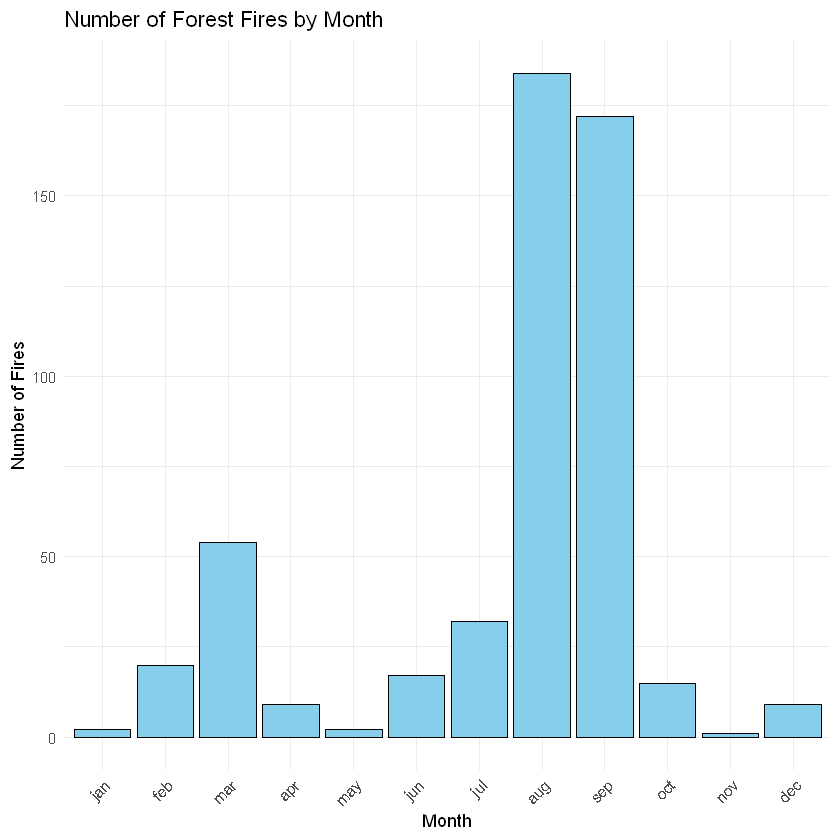

In [12]:
ggplot(fires_by_month, aes(x = month, y = fire_count)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(title = "Number of Forest Fires by Month", x = "Month", y = "Number of Fires") +
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

###### Visualize Fire by day of the week

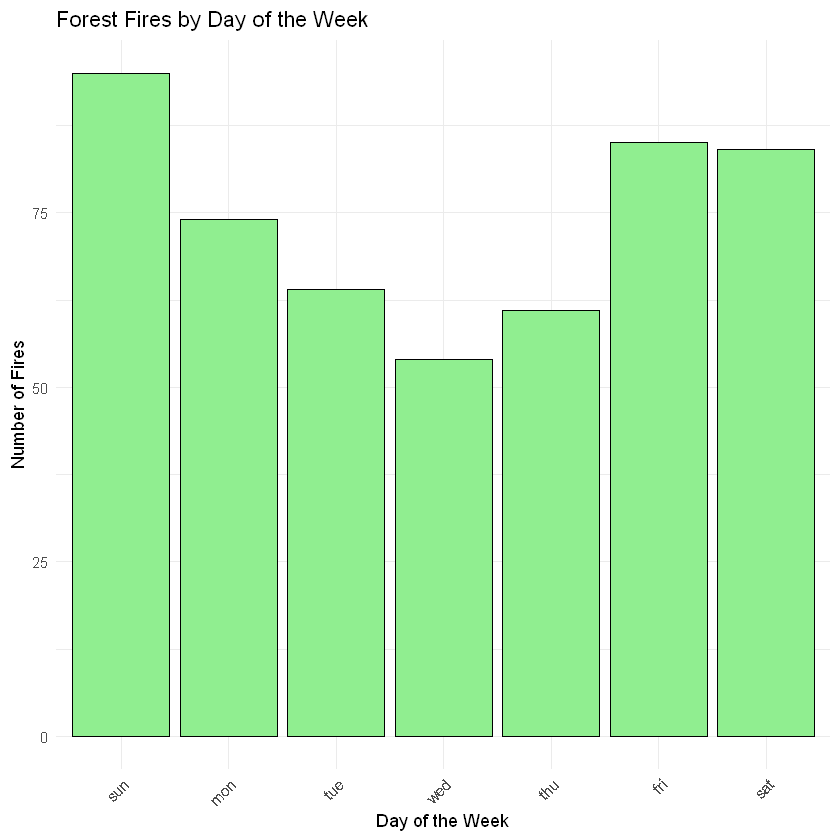

In [13]:
ggplot(fires_by_day, aes(x = day, y = fire_count)) +
  geom_bar(stat = "identity", fill = "lightgreen", color = "black") +
  labs(title = "Forest Fires by Day of the Week", x = "Day of the Week", y = "Number of Fires") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### Seasonal Patterns Observations

* From a yearly perspective, forest fires show strong numbers August-September 
    
* From a weekly perspective, forest fires tend to gain momentum beginning on Thursdays, peaking in intensity over the weekend

#### Monthly Fire Variables

###### Pivot the dataset for easier plotting

In [14]:
forestfires_long <- forestfires %>%
    pivot_longer(cols = c(FFMC, DMC, DC, ISI, temp, RH, wind, rain),
            names_to = "variable",
            values_to = "value")

In [26]:
options(repr.plot.width=12, repr.plot.height=8)  # Set size globally
# options(repr.plot.width = NULL, repr.plot.height = NULL) # Reverts back to defaults

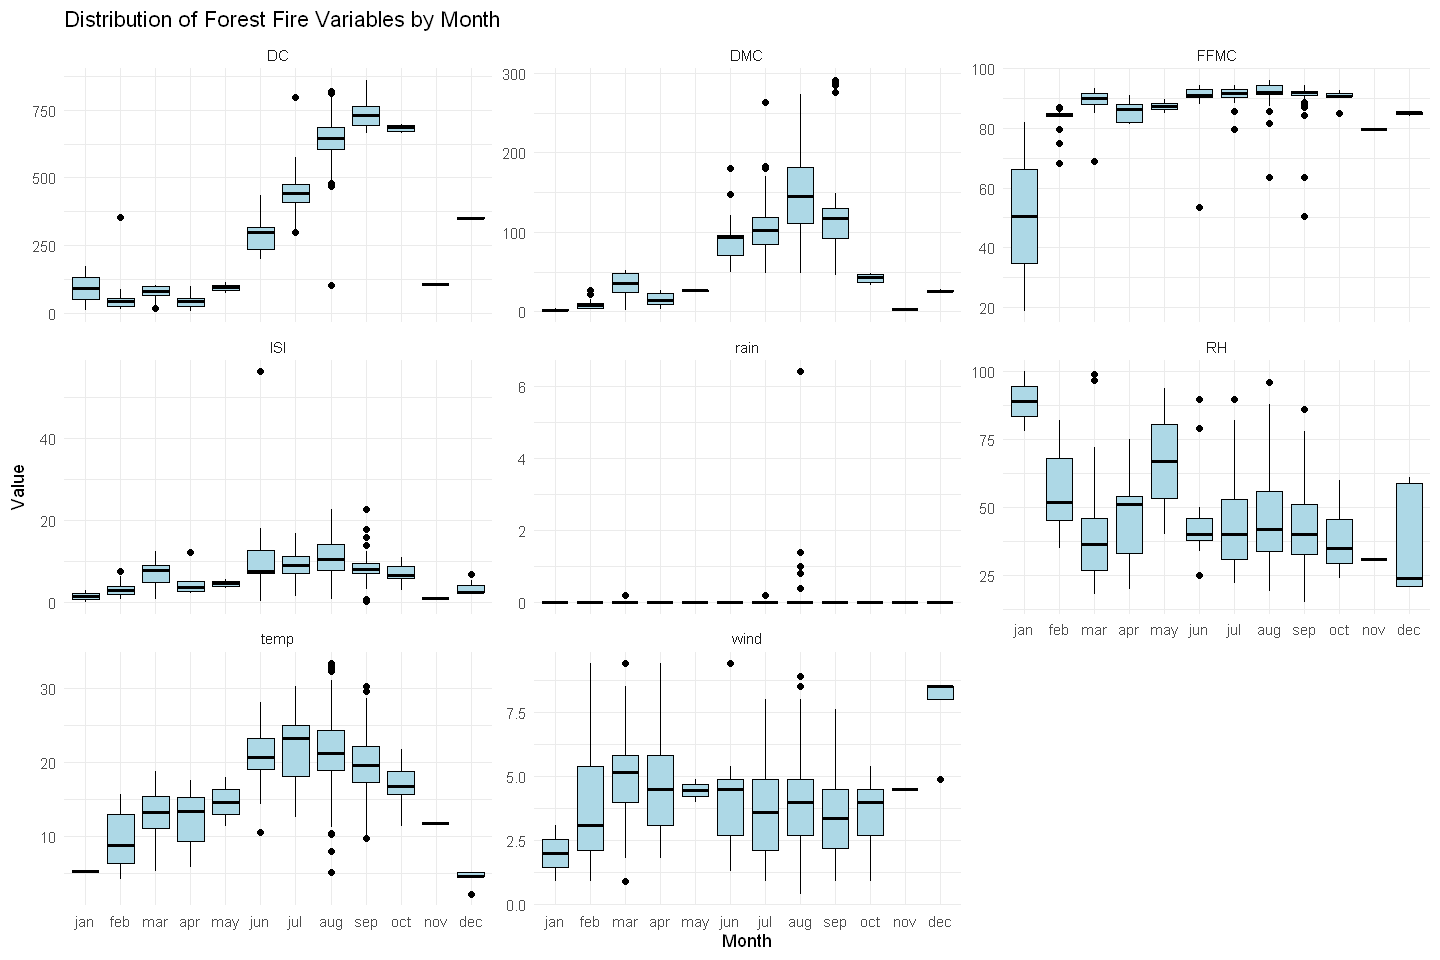

In [28]:
ggplot(forestfires_long, aes(x = month, y = value)) +
  geom_boxplot(fill = "lightblue", color = "black") + 
  facet_wrap(~variable, scales = "free_y") + 
  theme_minimal() +
  labs(title = "Distribution of Forest Fire Variables by Month",
       x = "Month",
       y = "Value")

#### Monthly Fire Variables Key Obervations

* Temperatures are at it's highest from June-September

* The winds are relatively strong between August-September
    * Combining this data with the temperature distributions compliments the fires by month visualizations 

#### Examine Forest Fire Severity

ggplot(forestfires_long, aes(x = value, y = area)) +
  geom_point() +
  facet_wrap(~ variable, scales = "free_x") +
  labs(title = "Relationship Between Forest Fire Variables and Area Burned",
       x = "Variable Value", y = "Area Burned (ha)") +
  theme_minimal()

#### Forest Fire Severity Key Obervations

* FFMC (Fine Fuel Moisture Code) show when its values are high (dryness), the areas burned are high

* Low rain values show negative correlation to area, which compliment the FFMC observation due to dryness

* High DC (Drought Code) indicates severe drought conditions, showing a slight increase in areas burned 

#### Removing Outliers for potential Clarity

###### Filter area below 500

In [41]:
forestfire_filter <- forestfires %>%
filter(area > 0 & area < 500)

In [42]:
forestfires_longer <- forestfire_filter %>%
    pivot_longer(cols = c(FFMC, DMC, DC, ISI, temp, RH, wind, rain),
            names_to = "variable",
            values_to = "value")

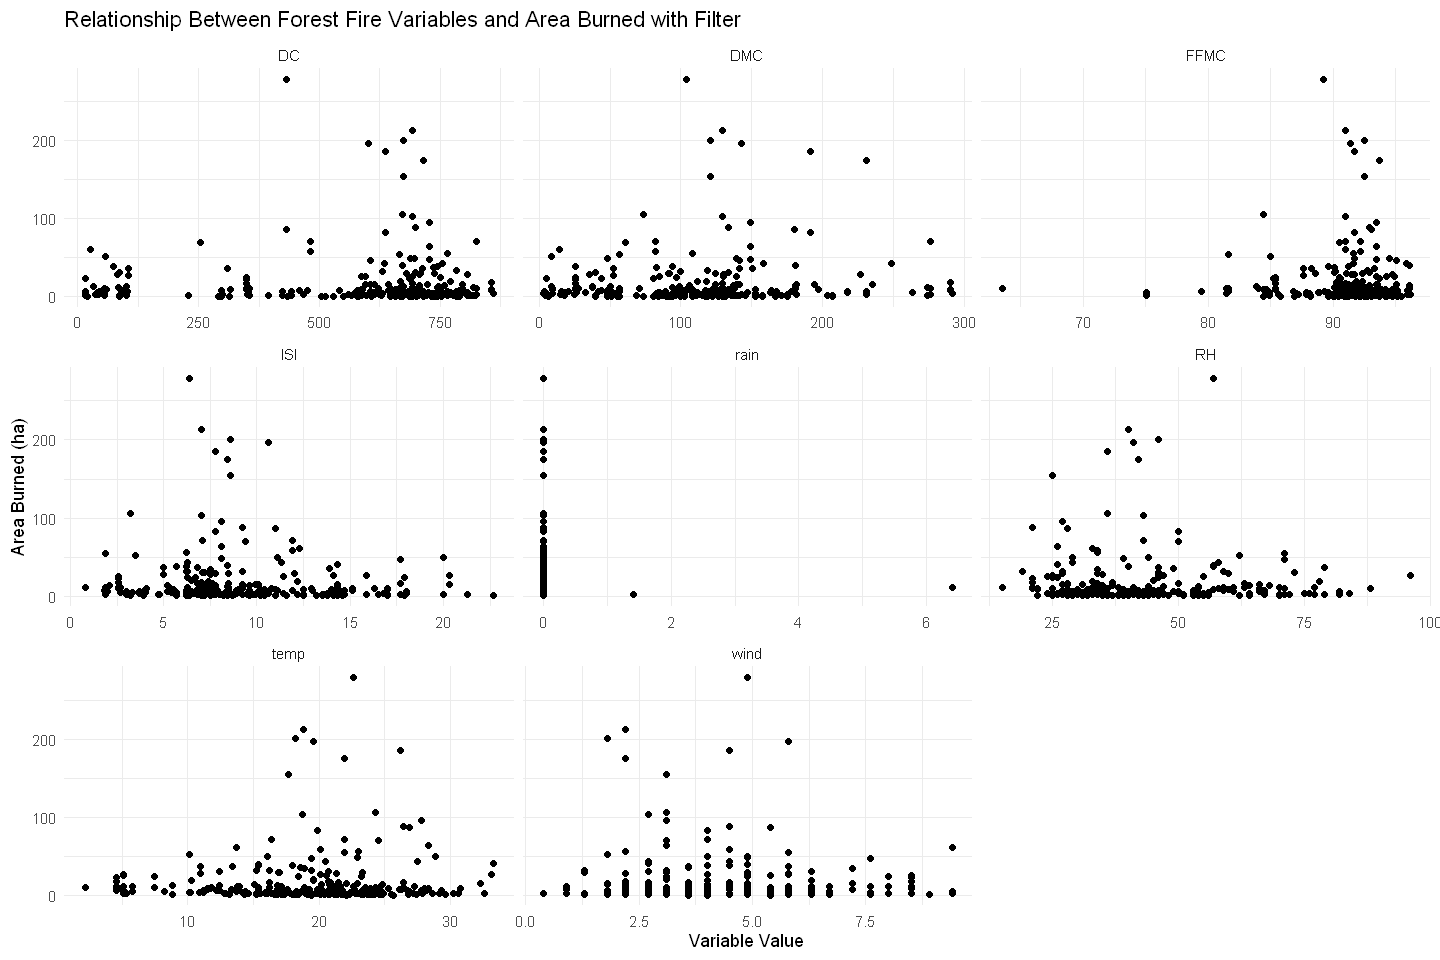

In [43]:
ggplot(forestfires_longer, aes(x = value, y = area)) +
  geom_point() +
  facet_wrap(~ variable, scales = "free_x") +
  labs(title = "Relationship Between Forest Fire Variables and Area Burned with Filter",
       x = "Variable Value", y = "Area Burned (ha)") +
  theme_minimal()

#### Clarity Observations

* The results are shown with clearer results, showing more **significant** factors influencing fire severity

    * FFMC (Fine Fuel Moisture Code) **clearly** show when its values are high (dryness), the areas burned are high. 

    * Low rain values show **stronger negative correlation** to area, which compliment the FFMC observation due to dryness

    * High DC (Drought Code) indicates severe drought conditions, showing a **more visible** increase in areas burned 